<a href="https://colab.research.google.com/github/amytan830/ENGR-120/blob/main/Group10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: Career Bot**

**Team Members:** Mai Kaewrawang, Karlie Aleman, Amy Tan

**Description:** Our chatbot aims to help job seekers in their career journey by providing information such as median salary, education requirements, and skills needed for their choice of career/occupation. Furthermore, the chatbot also includes visualizations to show a few job trends.

**Install and Import Libraries:** This is to make sure that the user has all neccessary libraries needed to run the chatbot and the relevant data.

In [1]:
#Install Libraries
!pip install pyinputplus
!pip install colorama

# Import Libraries
import pandas as pd
import pyinputplus as pyip
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from colorama import Fore

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=PyInputPlus-0.2.12-py3-none-any.whl size=11295 sha256=31d83b89dd465f01bb333abe400ced8bdf4070a9832d11c3e5ddeaf14f62e73d
  Stored in directory: /root/.cache/pip/wheels/13/ec/a5/f780c8008b74e885aada43369ebf4d350edfd12bb5909ccb23
  Created wheel for pysimplevalidate: filename=PySimpleValidate-0.2.12-py3-none-any.whl size=16177 sha256=43efa538cdeef09ef7cdcc5e72f997775703e0c3b46b260636b6a853189be0af
  Stored in directory: /root/.cache/pip/wheels/64/29/c9/2ee861e5b0775e289013b7c7157e0bdcea3a1b844f835b2eb8
  Created wheel for stdiomask: filename=stdiomask

**Import Data:** The following code imports all the necessary data and uses pandas to read and create dataframe for each dataset. Additionally, data manipulation is performed to clean the datasets, which includes tasks such as renaming columns, removing unnecessary columns and/or rows, handling missing values, and converting data types to ensure consistency and accuracy.

In [2]:
# Read Data and Create dataframes(7 in total)

## 1. Jobs based on Education dataset ##
edu_path = 'https://raw.githubusercontent.com/mkaewrawang/ENGR120Project/refs/heads/main/jobedu.csv'
jobedu_df = pd.read_csv(edu_path)

#Rename column
jobedu_df.rename(columns = {
    'employment_matrix': 'Job Title'}, inplace = True)

## 2. Skills dataset ##
skills_filepath = 'https://docs.google.com/spreadsheets/d/1pdxTk6HOC2PbnDARqrh3B6-lH7JGdqVVJffvDy3SdM0/export?format=csv'
skills_df = pd.read_csv(skills_filepath)

#Rename column
skills_df.rename(
    columns = {'2023 National Employment Matrix title': 'Job title'},
    inplace = True)

# Clean up occupation names that have '[2]' at the end
skills_df['Job title'] = (
    skills_df['Job title'].str.replace(r'\[\d+\]$', '',regex = True)
)
## 3. National Salaries dataset ##
nat_salary_filepath = 'https://github.com/amytan830/ENGR-120/raw/refs/heads/main/National_Salaries.csv'
nat_salary_df = pd.read_csv(nat_salary_filepath)

# Rename rows
nat_salary_df.rename(columns = {
    '2023 National Employment Matrix title': 'Occupation',
    'Median annual wage, dollars, 2023[1]': 'Median_annual_wage'},
                inplace = True)

# "Data is unavailable for values denoted with a (—)": Remove rows
nat_salary_df = nat_salary_df[nat_salary_df['Occupation'] != '—']

# Clean up occupation names that have '[2]' at the end
nat_salary_df['Occupation'] = (
    nat_salary_df['Occupation'].str.replace(r'\[\d+\]$', '',regex = True)
)

# Remove spaces from occupation names
nat_salary_df['Occupation'] = nat_salary_df['Occupation'].str.strip()

## 4. California salaries dataset ##
salary_filepath = 'https://github.com/amytan830/ENGR-120/raw/refs/heads/main/Salaries_CA.csv'
salary_df = pd.read_csv(salary_filepath)

# Rename columns
salary_df.rename(columns = {
    'OCC_TITLE': 'JOB_TITLE'},
    inplace = True)

# Drop rows with no value in relevant columns (indicated by *, **, #)
salary_df = salary_df[~salary_df['A_MEDIAN'].isin(['*', '**', '#'])]

# Convert numeric columns from object to float datatype
salary_df['A_MEDIAN'] = (
    salary_df['A_MEDIAN'].str.replace(',', '').astype(int)
)

## 5. Largest occupations in California dataset ##
ca_emp_filepath = 'https://github.com/amytan830/ENGR-120/raw/refs/heads/main/Emp_CA.csv'
ca_emp_df = pd.read_csv(ca_emp_filepath)

# Remove commas for 'Employment' column and change datatype to integer
ca_emp_df['Employment'] = (
    ca_emp_df['Employment'].str.replace(',', '').astype(int)
)
## 6. Fastest growing occupations dataset ##
growing_occ_filepath = 'https://github.com/amytan830/ENGR-120/raw/refs/heads/main/Fastest_growing_occupations.csv'
growing_occ_df = pd.read_csv(growing_occ_filepath)

# Drop irrelevant columns
growing_occ_df.drop (columns = ['2023 National Employment Matrix code',
                                'Employment change, numeric, 2023–33',
                                'Median annual wage, dollars, 2023'],
                    inplace = True)

# Drop row 0 containing all occupation total since it is not relevant
growing_occ_df = growing_occ_df.drop(index = 0)

# Rename column names
growing_occ_df.rename(columns = {
    '2023 National Employment Matrix title': 'Job_Title',
    'Employment, 2023': '2023_emp',
    'Employment, 2033': '2033_emp',
    'Employment change, percent, 2023–33': 'Emp_percent_change'},
                inplace = True)


## 7. Fastest declining occupations dataset ##
decline_occ_filepath = 'https://github.com/amytan830/ENGR-120/raw/refs/heads/main/Fastest_declining_occupations.csv'
decline_occ_df = pd.read_csv(decline_occ_filepath)

# Drop irrelevant columns
decline_occ_df.drop (columns = ['2023 National Employment Matrix code',
                                    'Employment change, numeric, 2023–33',
                                    'Median annual wage, dollars, 2023'],
                        inplace = True)

# Drop row 0 containing all occupation total since it is not relevant
decline_occ_df = decline_occ_df.drop(index = 0)

# Rename column names
decline_occ_df.rename(columns = {
        '2023 National Employment Matrix title': 'Job_Title',
        'Employment, 2023': '2023_emp',
        'Employment, 2033': '2033_emp',
        'Employment change, percent, 2023–33': 'Emp_percent_change'},
                    inplace = True)


**Main Menu:** This is the first introduction section the user will encounter when they use our chatbot. The main menu has four options: education requirements, skills requirements, median salaries, and job market visualizations. Next, the user has the option to return to the main menu to select other options or quit the chatbot at the end of each of the four options.

In [3]:
# Main Menu
def main_menu():
    """Displays the main menu guiding job seekers to explore career paths."""
    print(
        'Hi! Welcome to the Career Chatbot. '
        'We specialize in assisting job seekers navigate through '
        'their career job search. '
    )
    job = pyip.inputMenu(
        [
            'Jobs according to education level',
            'Job skills required for different occupations',
            'Salaries for different fields',
            'Visualizations for job market trends',
        ],
        numbered = True
    )
    job = job.lower()
    if job == 'jobs according to education level':
        edu_menu()
    elif job == 'job skills required for different occupations':
        job_skills_menu()
    elif job == 'salaries for different fields':
        menu_opt3()
    elif job == 'visualizations for job market trends':
        menu_opt4()

# Restart function
def menu_restart_quit():
    """Ask user whether they want to restart or quit."""
    print('How would you like to proceed?')
    restart_quit = pyip.inputMenu(
        ['Return to the main menu', 'Quit'], numbered = True)
    if restart_quit.lower() == 'return to the main menu':
        print(f'{Fore.GREEN}Taking you back to the beginning...{Fore.RESET}')
        time.sleep(1)
        main_menu()  # Call main_menu fuction to restart
        return
    elif restart_quit.lower() == 'quit':
        print('Goodbye! Wishing you all the best on your job search!')
        print('Thank you for using our career chatbot.')
        return


**Part 1:** Menu Option 1 focuses on the education level needed for specific occupations. The user will select one type of education level, and the chatbot will generate ten random samples of the professions that require the education level the user selected (i.e., sales managers need a bachelor's degree).

In [4]:
# Part 1
def edu_menu():
    """After select option 1 from the main menu.
    The edu_menu() function gives user lists of possible occupations
    based on their education level.
    """
    edu_lvl = pyip.inputMenu(
        [
            'No formal educational credential',
            'High school diploma or equivalent',
            "Associate's degree",
            "Bachelor's degree",
            'Postsecondary nondegree award',
            "Master's degree",
            'Doctoral or professional degree',
        ],
        numbered = True
    )
    edu_lvl = edu_lvl.lower()

    jobedu_df['education_needed'] = jobedu_df['education_needed'].str.lower()

    # Filter jobedu_df based on the selected education level
    find_data = jobedu_df[jobedu_df['education_needed'] == edu_lvl]

    # Check if any data was found and print it
    if not find_data.empty:
        pd.set_option('display.max_colwidth', None)  # Avoid shortening text
        while True:  # Start a loop for random sampling
            sampled_data = find_data.sample(n = 10).drop(columns =
             ['education_needed'])
            print(f'Here are 10 random professions from ' +
                  f'{Fore.LIGHTMAGENTA_EX}{edu_lvl}{Fore.RESET}: ')
            display(sampled_data)

            # Caution note for jobs with [1] & [2] at the end of the texts
            print(f'{Fore.LIGHTRED_EX}Note:{Fore.RESET} ')
            print('[1] Data cover non-farm wage and salary workers and do ' +
                  'not cover the self-employed, ')
            print('owners and partners in unincorporated firms, ' +
                  'or household workers.')
            print('[2] Information from similar O*NET-SOC occupation(s) ' +
                  'imputed for this occupation. ')

            # Ask the user if they like the current list
            job_list = pyip.inputYesNo(f'Do you ' +
                                       f'{Fore.MAGENTA}like{Fore.RESET} ' +
                                       f'this list of occupations?')
            job_list = job_list.lower()
            if job_list == 'yes':
                explore = pyip.inputYesNo(f'{Fore.LIGHTBLUE_EX}Would ' +
                f'you like to explore other education ' +
                f'credentials?{Fore.RESET}')
                if explore == 'yes':
                    edu_menu()
                else:
                    menu_restart_quit()
                break
            else:
                print('Generating a new list of occupations...')
                time.sleep(1)
    else:
        print(f'No data found for the education level: ' +
              f'{edu_lvl}. Please check the input.')

**Part 2:** Menu Option 2 will prompt users to identify which occupation they want to learn the top 3 skills for. The user will input an occupation, and the chatbot will output the top 3 skills needed for the desired occupation and a rating of 1-5, 1 being the least important and 5 being the most important, based on the data set we have provided.

In [5]:
# Part 2
def job_skills_menu():
    """When users select menu option 2.
    Display top skills required for a specific occupation.
    """

    # Collect data for the occupation desired
    job = input(
        'What occupation are you interested in learning skills for? '
         ).lower()
    print(f"{Fore.YELLOW}Great Choice! Give me a moment while I generate the \
top skills...{Fore.RESET}")
    time.sleep(1)

    # Check if occupation exists in the data set
    if skills_df[skills_df['Job title'].str.contains(job, case = False)].empty:
        print(f"{Fore.RED}Sorry, we do not have information on that occupation.\
Would you like to enter a new one? {Fore.RESET}")

    else:
        df_job = skills_df[skills_df['Job title'].str.contains(
            job, case = False)]

        # Get unique occupation names
        matching_occupations = df_job['Job title'].unique()
        # Create list of matching occupations
        occupation_choices = []
        for occupation in matching_occupations:
            if occupation not in occupation_choices:
                occupation_choices.append(occupation)

        # Create condition where there is only one matching occupation
        if len(occupation_choices) == 1:
            selected_occupation = occupation_choices[0]
            print(f'Only one match found: {selected_occupation}')
            job_selected = df_job[df_job['Job title'] == selected_occupation]
        else:
            selected_occupation = pyip.inputMenu(
                occupation_choices,
                prompt=(
                    'Here are all the occupations in our database '
                    'that match your input. '
                    'Please select one of the following:\n'),
                numbered=True
            )
            job_selected = df_job[df_job['Job title'] == selected_occupation]

        # Convert data to long format if occupation exists
        col_names = job_selected.columns.tolist()
        df_long = pd.melt(job_selected, id_vars=['Job title'],
                          value_vars=col_names)
        df_long.rename(columns={'variable': 'Skill', 'value': \
                                'Rating'}, inplace=True)

        # Output top 3 skills for occupation
        top_skills = df_long.nlargest(3, 'Rating')
        print(f"These are the top 3 skills for \
{Fore.BLUE}{selected_occupation.title()}{Fore.RESET}:")
        for idx, row in top_skills.iterrows():
            print(f"{Fore.GREEN}{row['Skill']}: {row['Rating']}{Fore.RESET}")
        print(f"{Fore.RED}Note:{Fore.RESET} Rating is on a scale of 1 to 5, \
with 5 being the most important.")

    # Follow up question
    follow_up = pyip.inputYesNo(
        'Would you like to see skills for another occupation? '
        )
    if follow_up == 'yes':
        job_skills_menu()
    elif follow_up == 'no':
        menu_restart_quit()


**Part 3:** The purpose of menu option 3 is to provide salary information for the occupation that is inputted by the user. Based on the user's input, a list of matching occupations in the data frame will be generated for the user to choose from. Then, the median annual wage, based on national data, for that occupation will be printed. After, the user has the choice to look up salary for another occupation, return to the main menu, or quit.

In [6]:
# Part 3

# Define function for next steps after first interaction is completed
def another_occ():
    """ Gives choice for users to enter another occupation,
     return to main menu, or quit.
      """
    another = pyip.inputYesNo(
        'Would you like to look at the salary for another occupation? '
        ).lower()
    if another == 'yes':
        print('Yay! Rebooting the system!')
        time.sleep(1)
        menu_opt3()
    elif another == 'no':
        print('Aww, okay.')
        menu_restart_quit()

# Define function to call menu option 3 when it is selected from the main menu
def menu_opt3():
    """ When user selects menu option 3. Provides salary information
    for occupation that user enters.
    """
    job = input(f'What occupation would you like to know the salary for?\n'
                f'Please enter a specific occupation or keyword: ')
    job = job.lower().strip()

    # Loop to check if input contains matching occupation
    # if there is a match, loop exits and moves on to following code to get salary information from appropriate row
    # if no match, ask the user to enter another occupation
    while nat_salary_df[
        nat_salary_df['Occupation'].str.contains(job, case = False)].empty:
        print(f'{Fore.RED}Sorry, there is no matching occupation in ' +
              f'our database. Please try again.{Fore.RESET}'
        )
        job = input('What occupation would you like to know the salary for? ')
        job = job.lower().strip()

    # Match user input to occupations in dataframe
    match = nat_salary_df[nat_salary_df['Occupation'].str.contains(
        job, case = False)]

    # Get unique occupation names
    matching_occupations = match['Occupation'].unique()

    # Create list of matching occupations
    occupation_choices = []
    for occupation in matching_occupations:
        if occupation not in occupation_choices:
            occupation_choices.append(occupation)

    # Create condition where there is only one matching occupation
    if len(occupation_choices) == 1:
        selected_occupation = occupation_choices[0]
        print(f'Only one match found: {selected_occupation}')
    else:
    # If more than one matching occupation, output list for user to choose from
        selected_occupation = pyip.inputMenu(
            occupation_choices,
            prompt = (f'{Fore.BLUE}Here are all the occupations in our ' +
                      f'database that match your input. Please select ' +
                      f'one of the following:{Fore.RESET}\n'),
            numbered=True
        )
    selected_occupation = selected_occupation.lower()

    # Get salary for selected occupation
    selected_row = match[match['Occupation'].str.lower() == selected_occupation]
    salary = selected_row.iloc[0]['Median_annual_wage']
    print(
        f'The occupation {Fore.RED}{selected_occupation}{Fore.RESET} ' +
        f'receives a median annual salary of {Fore.GREEN}${salary}{Fore.RESET}.'
        )

    # Ask user how they want to proceed
    another_occ()

**Part 4:** The purpose of menu option 4 is to show users interesting job statistics through visualizations. The user selects which visualization they are interested in, and the respective graph for that data will be displayed. The user can choose to view more visualizations, return to main menu, or quit.

In [7]:
# Part 4
# Menu option #4

# Define function to create barplots
def create_barplot(data, x, y, xlabel, ylabel = None, color = None):
    """Creates a barplot based on inputs for data, axis labels, and color.
    Parameters:
        data: The data to use for the barplot
        x: The column name for the x-axis variable
        y: The column name for the y-axis variable
        xlabel: Label for the x-axis
        ylabel: Label for the y-axis (default is no label)
        color: Color for the bars (default is blue)
        """
    barplot = sns.barplot(data=data, x=x, y=y, color=color)
    barplot.set(xlabel=xlabel, ylabel=ylabel)
    plt.show()
    time.sleep(2)

# Define function to ask users follow-up questions
def next_steps():
    """ Presents user with options for what the user can do
    after seeing one visualization.
    """
    next = pyip.inputYesNo('I hope you found the visualization interesting! ' +\
          'Do you want to visualize another trend? ')
    next = next.lower()
    if next == 'yes':
        print('Alrighty!')
        time.sleep(1)
        menu_opt4()
    elif next == 'no':
        menu_restart_quit()

# Define function to run menu option 4 when selected in the main menu
def menu_opt4():
    """ When user selects menu option 4.
    Displays visualizations for job market trends.
    """
    print('Hi there! I have a couple of visualizations to show. ' +\
          'Which one would you like to see?')

    viz_choice = pyip.inputMenu(
        [
        'Occupations with highest median annual wage in California',
        'Most employed occupations in California as of May 2023',
        'Fastest growing occupations between 2023 and 2033',
        'Fastest declining occupations between 2023 and 2033'
         ],
        numbered = True
        )

    viz_choice = viz_choice.lower()
    if viz_choice == 'occupations with highest median annual wage in california':
        top_20 = salary_df.nlargest(20, 'A_MEDIAN')
        print(f'Here is a barplot displaying ' +
              f'{Fore.RED}{viz_choice.title()} as of May 2023{Fore.RESET}')
        create_barplot(top_20,
                       x = 'A_MEDIAN',
                       y = 'JOB_TITLE',
                       xlabel = 'Annual Median Wage',
                       color = 'green')

    elif viz_choice == 'most employed occupations in california as of may 2023':
        print(f'Here is a barplot displaying ' +
              f'{Fore.RED}{viz_choice.title()}{Fore.RESET}')
        create_barplot(data = ca_emp_df,
                       x = 'Employment',
                       y = 'Occupation',
                       xlabel = 'Number of People Employed',
                       color = 'deepskyblue')

    elif viz_choice == 'fastest growing occupations between 2023 and 2033':
        top_growing_jobs = growing_occ_df.nlargest(10, 'Emp_percent_change')
        print(f'Here is a barplot displaying ' +
              f'{Fore.RED}{viz_choice.title()}{Fore.RESET}')
        create_barplot(top_growing_jobs,
                      x = 'Emp_percent_change',
                      y = 'Job_Title',
                      xlabel = 'Percent Increase in Employment',
                      color = 'orange')

    elif viz_choice == 'fastest declining occupations between 2023 and 2033':
        decline_top_10 = decline_occ_df.nsmallest(10, 'Emp_percent_change')
        print(f'Here is a barplot displaying ' +
              f'{Fore.RED}{viz_choice.title()}{Fore.RESET}')

        # Make customized barplot
        decline_viz = sns.barplot(data = decline_top_10,
                                  x = 'Emp_percent_change',
                                  y = 'Job_Title',
                                  color = 'red')

        decline_viz.tick_params(bottom = False, labelbottom = False)
        decline_viz.set(xlabel = '% Change in Employment', ylabel = None)

        # Move y-axis labels to the right
        decline_viz.yaxis.set_label_position('right')
        decline_viz.yaxis.tick_right()

        # Add percent lablels next to bar
        for index, value in enumerate(decline_top_10['Emp_percent_change']):
            plt.text(value,
                     index,
                     f'{value}%',
                     color = 'white',
                     ha = 'left',
                     va = 'center',
                     weight = 'bold',
                     fontsize = 10)
        plt.show()
        time.sleep(2)

    # Call next_steps() function to ask user follow up questions
    next_steps()


**Start Chatbot:** The last step includes calling the main_menu() function to start the chatbot. All the components are organized in order and functions are specifically defined in order for each part, so call the function to execute the chatbot. Let's take a look at what our career bot has to offer!

Hi! Welcome to the Career Chatbot. We specialize in assisting job seekers navigate through their career job search. 
Please select one of the following:
1. Jobs according to education level
2. Job skills required for different occupations
3. Salaries for different fields
4. Visualizations for job market trends
1
Please select one of the following:
1. No formal educational credential
2. High school diploma or equivalent
3. Associate's degree
4. Bachelor's degree
5. Postsecondary nondegree award
6. Master's degree
7. Doctoral or professional degree
Bachelor's Degree
Here are 10 random professions from bachelor's degree: 


,Job Title
136,Foresters
67,Loan officers
59,Budget analysts
47,Labor relations specialists
16,Compensation and benefits managers
304,Film and video editors
265,Art directors
185,Health education specialists
101,Computer hardware engineers
273,Graphic designers


Note: 
[1] Data cover non-farm wage and salary workers and do not cover the self-employed, 
owners and partners in unincorporated firms, or household workers.
[2] Information from similar O*NET-SOC occupation(s) imputed for this occupation. 
Do you like this list of occupations?yes
Would you like to explore other education credentials?no
How would you like to proceed?
Please select one of the following:
1. Return to the main menu
2. Quit
1
Taking you back to the beginning...
Hi! Welcome to the Career Chatbot. We specialize in assisting job seekers navigate through their career job search. 
Please select one of the following:
1. Jobs according to education level
2. Job skills required for different occupations
3. Salaries for different fields
4. Visualizations for job market trends
2
What occupation are you interested in learning skills for? Nurse
Great Choice! Give me a moment while I generate the top skills...
Here are all the occupations in our database that match your input. Please 

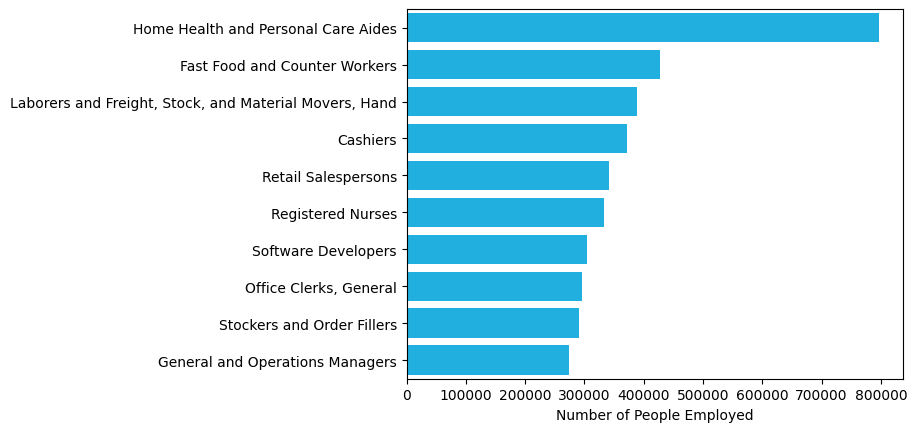

I hope you found the visualization interesting! Do you want to visualize another trend? yes
Alrighty!
Hi there! I have a couple of visualizations to show. Which one would you like to see?
Please select one of the following:
1. Occupations with highest median annual wage in California
2. Most employed occupations in California as of May 2023
3. Fastest growing occupations between 2023 and 2033
4. Fastest declining occupations between 2023 and 2033
4
Here is a barplot displaying Fastest Declining Occupations Between 2023 And 2033


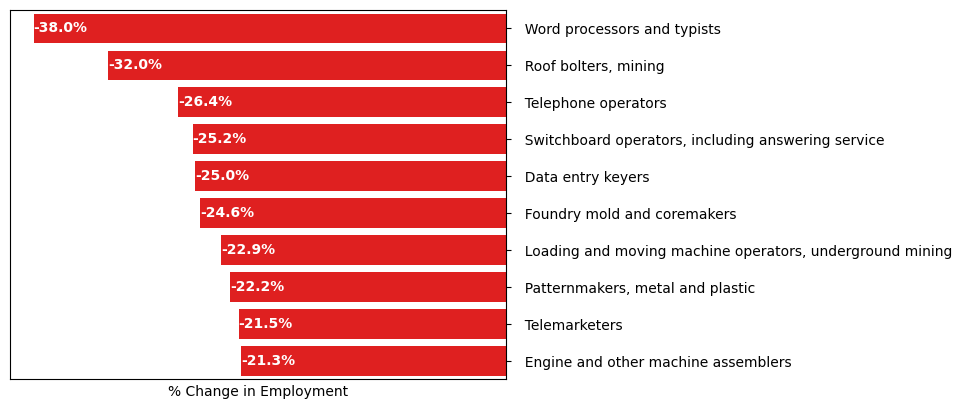

I hope you found the visualization interesting! Do you want to visualize another trend? no
How would you like to proceed?
Please select one of the following:
1. Return to the main menu
2. Quit
2
Goodbye! Wishing you all the best on your job search!
Thank you for using our career chatbot.


In [9]:
# Start chatbot
# Call main_menu() function to start chatbot!
main_menu()